In [62]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import pandas as pd
import numpy as np

# Load Dataset

In [63]:
dataset = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(dataset[0])

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].astype(str)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


# Data Preprocessing dan Exploratory Data Analysis

- ## Memeriksa missing values, tipe data,  dan statistik pada kolom / variable numerik di dalam dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [65]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


- ## Memeriksa Distribusi dan Outliers pada kolom / variable numerik

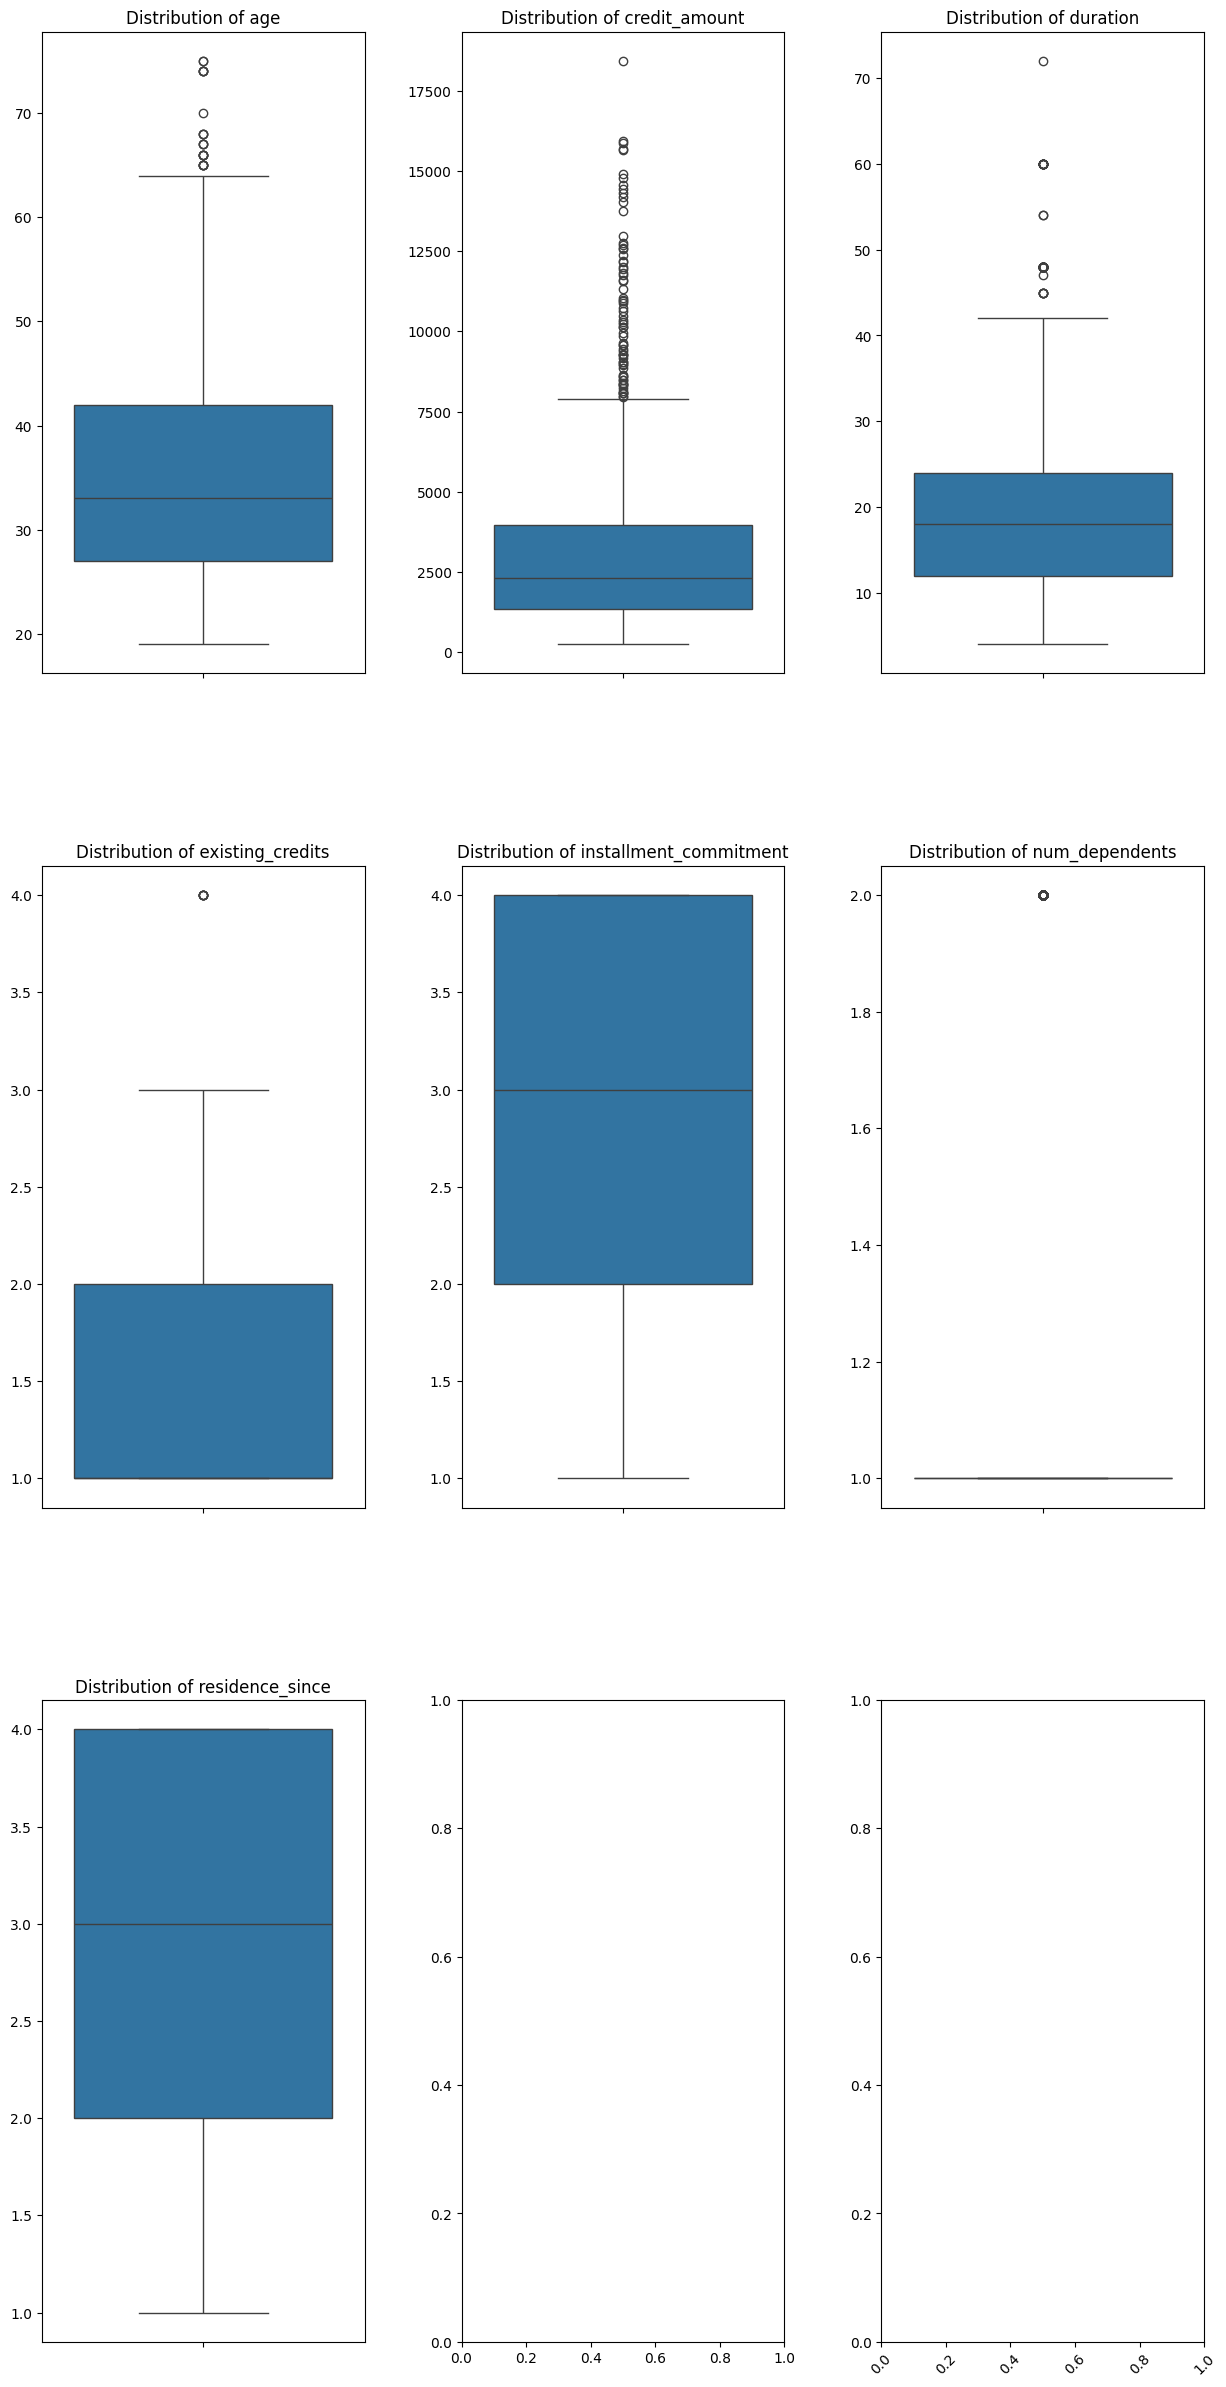

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(15, 30))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns.difference(categorical_cols), axes)):
    plt.xticks(rotation=45)
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3, hspace=0.3)


- ## Encoding

In [67]:
encoder = LabelEncoder()
for i in categorical_cols:
    df[i] = encoder.fit_transform(df[i])

df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,3,31.0,1,1,1.0,3,1.0,0,1,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,40.0,1,1,1.0,0,1.0,1,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,0,38.0,1,1,1.0,1,1.0,0,1,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,2,23.0,1,0,1.0,1,1.0,1,1,0


# Pelatihan Model

Pada kasus ini, model yang digunakan adalah  Logistic Regression, Naive Bayes, KNN (K-Nearest Neighbor), SVM (Support Vector Machines), Random Forest, dan XGBoost. Dari model- model tersebut, akan dipilih model yang menghasilkan score tertinggi.

Pada proses pelatihan akan dilakukan Hyperparameter tuning dengan menggunakan metode GridSearchCV sehingga akan didapatkan kombinasi hyperparameter yang terbaik (menghasilkan score tertinggi). Pada setiap kombinasi hyperparameter, akan dilakukan stratified 5-fold cross validation agar estimasi / score yang dihasilkan lebih akurat saat dibandingkan dengan model lainnya.

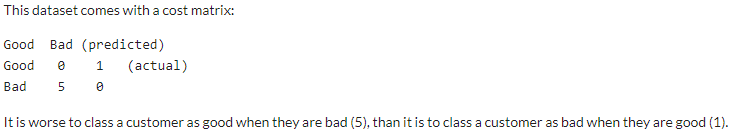

Pada gambar di atas, dapat dinyatakan bahwa pada kasus ini, seseorang dengan class 'bad' yang diklasifikasikan sebagai 'good' oleh model (false positive) memiliki pengaruh / konsekuensi yang lebih besar (cost = 5) daripada seseorang dengan class 'good' yang diklasifikasikan sebagai 'bad' (false negative) (cost = 1). Sehingga, kita perlu menggunakan metric scoring yang dapat meminimalisir adanya false positive. Salah satu metric yang dapat digunakan pada kasus ini adalah precision. Precision mengukur seberapa banyak dari prediksi positif yang benar dari semua prediksi positif yang dilakukan oleh model. Berikut ini adalah formula untuk menghitung precision pada sebuah model:

`Precision = True Positives / (True Positives + False Positives)`

In [68]:
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [69]:
models = [
    {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        },
        'name': 'Logistic Regression'
    },
    {
        'model': MultinomialNB(),
        'params': {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
        'name': 'Multinomial Naive Bayes'
    },
    {
        'model': GaussianNB(),
        'params': {},
        'name': 'Gaussian Naive Bayes'
    },
    {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'], 
            'metric': ['euclidean', 'manhattan'],
        },
        'name': 'K-Nearest Neighbor'
    },
    {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 20], 
            'min_samples_split': [2, 5, 10], 
            'min_samples_leaf': [1, 2, 4],  
            'max_features': ['sqrt', 'log2', None]
        },
        'name': 'Decision Tree'
    },
    {
        'model': SVC(),
        'params': {},
        'name': 'Support Vector Machines'
    },
    {
        'model': RandomForestClassifier(),
        'params':  {
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 5, 10, 20], 
        },
        'name': 'Random Forest'
    },
    {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
        },
        'name': 'XGBoost'
    }
]

In [70]:
for i in models:
    grid_search = GridSearchCV(i['model'],param_grid=i['params'],cv=skf,scoring='precision',error_score='raise')
    grid_search.fit(df.iloc[:,:-1].values, df.iloc[:, -1].values)
    results.append((i['name'],grid_search.best_score_,grid_search.best_params_))
    print(i['name'],'v')

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Logistic Regression v
Multinomial Naive Bayes v
Gaussian Naive Bayes v
K-Nearest Neighbor v
Decision Tree v
Support Vector Machines v
Random Forest v
XGBoost v


In [71]:
results = pd.DataFrame(results, columns=['Name','Score','Best Params'])
results.sort_values('Score',ascending=False, inplace=True)

# Analisis pada Model Terbaik